In [11]:
import numpy as np
import os
import seaborn as sns
import ipynb
import matplotlib.pyplot as plt
import math

In [12]:
%run Funciones.ipynb

In [13]:
# Lee el archivo y convierte el contenido a una lista de enteros
test_pacientes = ['054', '049', '051', '164', '078', '092', '010', '030', '178', '068', '109', '166', '019', '163', '035', '123', '125']
output_path_test = 'C:/Users/diego/Desktop/TFG/ProyectoTFG/VOI_predict'
output_path_gt = 'C:/Users/diego/Desktop/TFG/ProyectoTFG/GT_VOI'
tp = 0
fp= 0
fn = 0
v_errors = []

for pat in sorted(test_pacientes):
    #if pat == '010':
    with open(os.path.join(output_path_test, f"{pat}_predict_gt.txt"), "r") as file:
        data_predict = list(map(int, file.read().split()))
    
    # Agrupa los datos del archivo en cubos de 24 valores (cada cubo tiene 8 puntos 3D)
    cubes_predict = [data_predict[i:i+24] for i in range(0, len(data_predict), 24)]
    
    if len(cubes_predict) >= 1:
        array_gt = txt_array_gt(output_path_gt, pat, 8, 3).flatten().tolist()
        x_min_gt, y_min_gt, z_min_gt = array_gt[0], array_gt[1], array_gt[2]
        x_max_gt, y_max_gt, z_max_gt = array_gt[21], array_gt[22], array_gt[23]
        
        
        # Itera sobre cada cubo en array1 y realiza la comparación
        for cube in cubes_predict:
            
            x_min_p, y_min_p, z_min_p = cube[0], cube[1], cube[2]
            x_max_p, y_max_p, z_max_p = cube[21], cube[22], cube[23]
            
            contenido = (
                x_min_p <= x_min_gt <= x_max_p and x_min_p <= x_max_gt <= x_max_p and
                y_min_p <= y_max_gt <= y_max_p and y_min_p <= y_max_gt <= y_max_p and
                z_min_p <= z_max_gt <= z_max_p and z_min_p <= z_max_gt <= z_max_p
            )
            if contenido:
                volumen_real = volumen_info(x_min_gt, x_max_gt, y_min_gt, y_max_gt, z_min_gt, z_max_gt)
                volumen_predict = volumen_info(x_min_p, x_max_p, y_min_p, y_max_p, z_min_p, z_max_p)
                err_v = volumen_predict - volumen_real
                v_errors.append(err_v)
                tp = tp + 1
            
            else:
                fp = fp + 1
    else:
        fn = fn + 1
                
       

Métricas de Evaluación:
Precisión (Precision): 0.73
Sensibilidad (Recall): 0.69
F1-Score: 0.71
[[11  5]
 [ 4  0]]


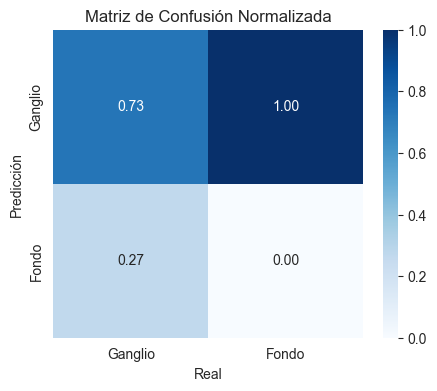

In [14]:
# Valores de la matriz de confusión
TP = tp
FP = fp
FN = fn
TN = 0  # No hay verdaderos negativos

# Crear la matriz de confusión
confusion_matrix = np.array([[TP, FN], [FP, TN]])

# Calcular las métricas
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Imprimir métricas
print("Métricas de Evaluación:")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(confusion_matrix)


# Normalizar la matriz de confusión por filas
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=0, keepdims=True)

# Visualización de la matriz de confusión normalizada
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["Ganglio", "Fondo"],
            yticklabels=["Ganglio", "Fondo"])
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("Matriz de Confusión Normalizada")
plt.show()


In [15]:
# Calcula lista de errores e
linear_diff_list = [(abs(v))**(1/3) for v in v_errors]

# media
mean_lin = sum(linear_diff_list) / len(linear_diff_list)

# Varianza y desviación estándar
var_lin = sum((x - mean_lin)**2 for x in linear_diff_list) / len(linear_diff_list)
std_lin = math.sqrt(var_lin)

# 3. Imprime el resultado con el formato deseado
print(f"Error medio lineal: {mean_lin:.2f} ± {std_lin:.2f} píxeles")

Error medio lineal: 16.41 ± 3.81 píxeles
